In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt


# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

In [2]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simplify column names
power_plants.columns = power_plants.columns.str.lower()

# Drop the first column
power_plants = power_plants.drop(columns = 'unnamed: 0')

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


The power plants file is a CSV. Unlike shapefiles or other geospatial file formats, `geopandas` doesn’t have a way to extract a geometry column from a CSV file, so we will need to create this geometry manually.

To do so we will use the longitude and latitude columns in the CSV, these indicate the location of the power plants in the NAD83 CRS (EPSG:4269). We can use this information to create a new `geopandas.GeoDataFrame` from the `pandas.DataFrame` using the geopandas function `points_from_xy()`:

In [3]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude,
                           power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,
                               geometry = points,
                               crs = 'EPSG:4269')


Check that we now have a `geometry` column:

In [4]:
power_plants['geometry']

0        POINT (-160.49722 55.33972)
1         POINT (-87.35682 33.45867)
2         POINT (-88.01030 31.00690)
3         POINT (-86.28306 32.58389)
4        POINT (-106.37500 31.75690)
                    ...             
12004     POINT (-82.37595 35.38014)
12005     POINT (-79.36770 36.00932)
12006     POINT (-79.73631 35.27343)
12007     POINT (-73.91048 42.87657)
12008     POINT (-77.27590 41.83800)
Name: geometry, Length: 12009, dtype: geometry

With the `geometry` column and CRS we can plot our dataset

<AxesSubplot:>

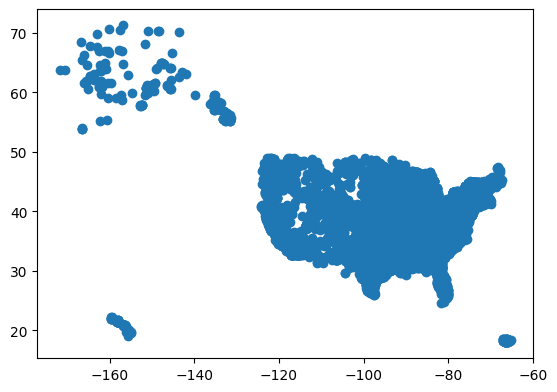

In [5]:
power_plants.plot()  

### f-strings
So far, we have printed variables using string concatenation inside the `print()` function. This means that we write commas between every string and variable we want to print, and then the `print()` function concatenates these into a single string. For example:

In [6]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


Another popular way of mixing strings and variables in print statements is by creating an **f-string** which stands for “formatted string”. The simplest syntax for an f-string is:
```f" some text {replace}"```
where `replace` can be a variable, an expression, or a function or method call.

In [7]:
# Example
print(f"ellipsoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


We just created a string replacing the value inside the curly brackets `{}`.

One of the advantages of using f-strings is that they offer customization for formatting the output:

In [8]:
# Set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS projected?:    False


### Import shapefile

In [9]:
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names 
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


and obtain some preliminary geospatial information about these states geodataframe:

epsg:4269


/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

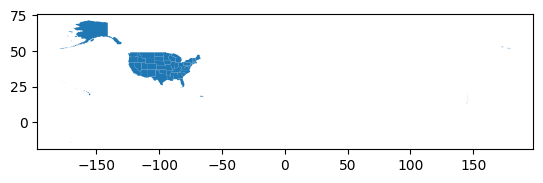

In [10]:
print(states.crs)
states.plot()

### `for` loops
It can be easier to work with the codes as numbers instead of strings, so let’s update the corresponding columns in the states geo-dataframe. We start by checking the data type of the `region`, `division`, and `statefp` columns:

In [11]:
 code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
 for column in code_cols: 
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


Remember for loops execute a block of code a fixed number of times, iterating over a set of objects. In this case, we iterate over the list of column names `code_cols = ['region', 'division', 'statefp']`.

### `assert`
Next, we update the data type of the code columns to be integers. This time, we check the data type of the column using the `is_numeric_dtype()` function inside an `assert` statement:

In [12]:
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])  # Check conversion

The `assert` keyword does nothing if the expression next to it evaluates to `True` and raises an `AssertionError` exception and stops your code form running any further. For example,

In [13]:
# Does nothing if statement is True
#assert 2+2 == 4

# Raises an error if statement is False
#assert 2+2 == 3

In our data type conversion code, since no `AssertionError` was raised, we can be confident that the data type was updated.

### Data selection
For this lesson, we want to use only the contiguous states. As seen in the plot, the data covers a bigger extension.

Lets select the data:

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

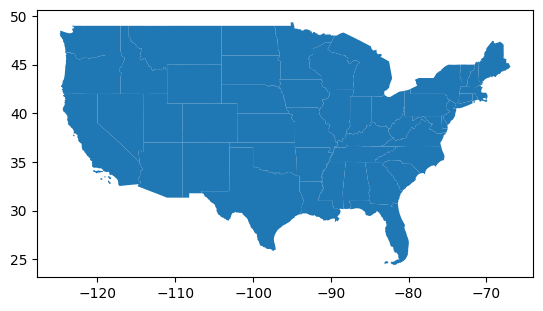

In [14]:
# Select contignuous US states
contiguous = states[(states.region != 9) & (~states.statefp.isin([2, 15]))]
contiguous.plot()

In this code we used the syntax

```
~df.column.isin([val1, val2, val3])
```

The ~ tilde symbol is used in Python to negate a statement. So the previous line could be read as “the values in `df`’s column which are not in the list `[val1, val2, val3]`.”

**Check-in:** Select the data in `power_plants` data frame for the contiguous US states.

<AxesSubplot:>

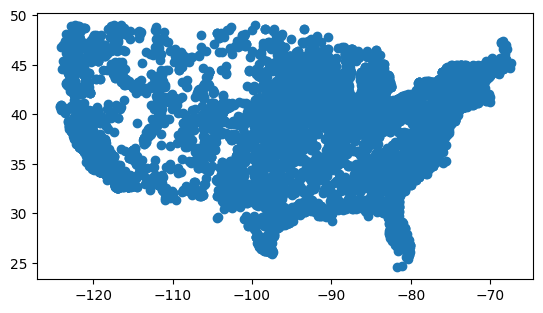

In [15]:
power_plants = power_plants[power_plants.state.isin(contiguous.name)]
power_plants.plot()

# power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Alaska', 'Hawaii'])]

### Plotting
Before we plot our data, lets make sure they are in the same CRS:

In [16]:
contiguous.crs == power_plants.crs

True

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


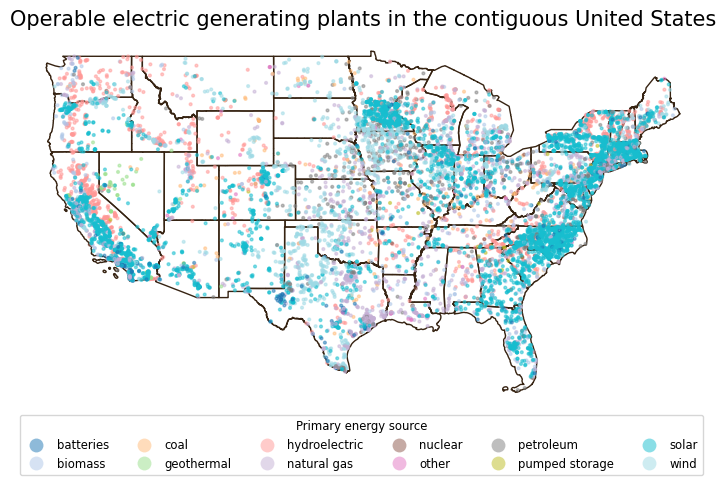

In [17]:
fig, ax = plt.subplots(figsize=(9, 5)) # Update figure size

# Remove the axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Operable electric generating plants in the contiguous United States', 
              fontsize=15)

# Add states
contiguous.plot(ax=ax,
               color='none',
               edgecolor='#362312')

# Add electric power plants colored by energy source
power_plants.plot(ax=ax, 
                  column='primsource',
                  legend=True,
                  markersize=4,
                  cmap='tab20',
                  alpha=0.5,
                  legend_kwds={
                      'title': 'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',
                      'bbox_to_anchor': (0, 0),
                      'ncol': 6  
                  })
                  
plt.show()

In the map above we specified the figure size when creating the plot. This size is given in inches, but can be <u>[updated to other units](matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html)</u> (pixels, cm, etc).

We also controlled the legend location using loc and `bbox_to_anchor` in the `legend_kwds`:

- `loc` indicates the corner of the legend we want to use for placement, and
- `bbox_to_anchor` is a tuple with coordinates indicating where to place the corner specified in `loc` relative to the axes. Values between 0 and 1 are within the axes.

`matplotlib` uses a variety of ways to locate elements within the graph and it is best to check the documentation to not spend too much time fidling with locations.

### `for` with `zip`

Often, we need to iterate simultaneously over two lists (or other iterables). The `zip()` function in Python allows you to combine two or more lists (or other iterables) so that you can iterate over their elements in pairs. When used with a `for` loop, it lets you process elements from each list together, like this example:


In [18]:
# Iterate over a single list
numbers = [1, 2, 3]
for num in numbers:
    print(num)
    
print('\n')

# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']

for num, letter in zip(numbers, letters):
    print(num, letter)

1
2
3


1 a
2 b
3 c


Let’s see a practical application of `for` loops and `zip()` with `matplotlib` subplots. A common situation when code gets repeated is when creating subplots. For example:

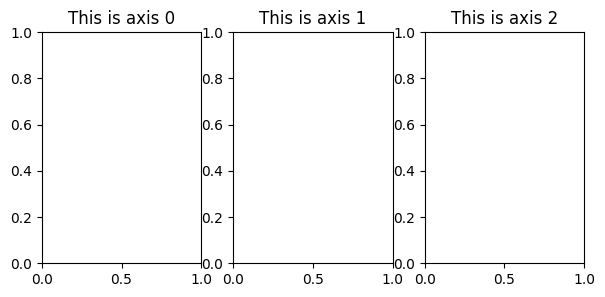

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7, 3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

In this example, notice that the `axes` variable returned by the `plt.subplots()` function is actually an array of axes we can iterate over. Remember that the figure and the axes are separete elements in a `matplotlib` plot.

**Check-in:** Use `for` and `zip()` to create the same subplots and avoid redundancy

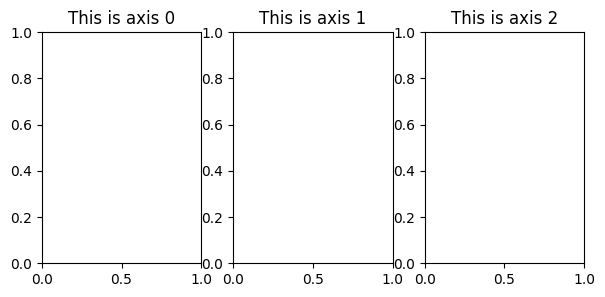

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7, 3))
titles = ['This is axis 0', 'This is axis 1', 'This is axis 2']

for ax, title in zip(axes, titles):
    ax.set_title(title)
    

**Exercise**
1. Select the power plants in California in a variable named ca_power_plants.
2. Create a list named top_sources with California’s top 3 electric primary sources.
3. Isolate the California state boundary in a variable named ca_boundary.
4. Recreate the plot

In [34]:
ca_power_plants = power_plants[power_plants['state'] == "California"]

top_sources = ca_power_plants["primsource"].value_counts().head(3)
print(top_sources)

california_boundary = contiguous[contiguous['name'] == "California"].boundary
california_boundary

solar            766
natural gas      328
hydroelectric    244
Name: primsource, dtype: int64


13    MULTILINESTRING ((-119.99987 41.18397, -119.99...
dtype: geometry

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


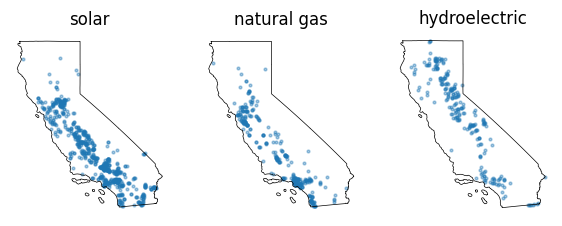

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7, 3))
titles = list(top_sources.index)

for ax, title in zip(axes, titles):
    ax.set_title(title)
    ax.axis('off')
    california_boundary.plot(ax = ax,
                             linewidth = 0.5,
                             color = 'black')
    ca_power_plants[ca_power_plants['primsource'] == title].plot(ax = ax,
                                                                 markersize = 4,
                                                                 alpha = 0.4,
                                                                 edgecolor = "C0")

### Functions
Next, we want to keep exploring these maps of the top 3 electric primary sources for different states. This is a scenario where creating functions can be useful. In Python, **functions** are blocks of reusable code designed to perform specific tasks, helping to make your code more modular and organized. The general syntax for defining a function is the following:

```
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

We define a function using:

1. the `def` keyword, followed by the function name, parentheses (which can contain parameters), and a colon.
2. The first line(s) of the function should be a `docstring`, this is a special kind of comment used to describe what the function will do. It must be indented and in between triple quotes `"""`.
3. After the docstring, you write the body of the function, this is the code that will be executed when the function is called. The wholek body of the function should be indentated to indicate the function’s scope.
4. The `return` keywork is used to allow the function to return values. Functions that do not return any values don’t need to have a `return` keyword.
Let’s see two simple examples just to get familiar with the syntax. In the first one we have a simple function with a one-line docstring, no parameters, and no return values.

In [23]:
def greet():
   """Print a greeting message."""
   print("Hello, welcome to the class!")

The second one has a single parameter and a more detailed docstring with information abou the arguments and return values.

In [24]:
def calculate_area(radius):
   """
   Calculate the area of a circle given its radius.
   
   Args:
       radius (float): The radius of the circle.
       
   Returns:
       float: The area of the circle, calculated as π * radius^2.
   """
   area = 3.14159 * radius ** 2
   return area

**Example:**
Going back to our power plants data frame, let’s create a function that will give us the top 3 primary energy sources for a given state:

In [25]:
def top3_sources(state, power_plants):
    """
    Find the top 3 electric primary sources of given state.
    
    Args:
        state (str): The US state we want information about.
        power_plants (pd.DataFrame): DataFrame containing data 
        on power plants, with at least 'state' and 'primsource' columns.
    Returns:
        list: A list of the top 3 primary sources of the state within the power_plants data frame.
    """
    state_power_plants = power_plants[power_plants['state']==state]
    top_sources = (state_power_plants['primsource']
                                .value_counts()
                                .index[:3]
                                .tolist()
                                )
    return top_sources

We may now reuse this function as much as we want!

In [26]:
print('Top 3 primary energy sources in Division 2 states:')
for state in ['New Jersey', 'New York', 'Pennsylvania']:
    print(state, ': ', top3_sources(state, power_plants))

Top 3 primary energy sources in Division 2 states:
New Jersey :  ['solar', 'natural gas', 'biomass']
New York :  ['solar', 'hydroelectric', 'natural gas']
Pennsylvania :  ['natural gas', 'solar', 'biomass']


Let’s do one more example and create a function that will produce a plot given a list of primary sources and a state name:

In [27]:
def plot_3_energy_sources(state, sources, power_plants):
    
    # Raise error if there are more than three sources
    assert len(sources) == 3, 'sources must have three elements to produce the plot'

    # Isolate the state boundary and power plants
    boundary = states[states.name==state]
    state_power_plants = power_plants[power_plants['state']==state]

    # Create plot
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 3))

    for ax, source in zip(axes, sources):
        boundary.plot(ax=ax,                
                      color='none',
                      edgecolor='#362312')
        subset = state_power_plants[state_power_plants['primsource'] == source]
        subset.plot(ax=ax, markersize=5, alpha=0.5)
        ax.set_title(source)
        ax.axis('off')  # Remove axes for a cleaner look

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")
    plt.tight_layout()
    plt.show()

We can now use our functions to produce plots for any state:

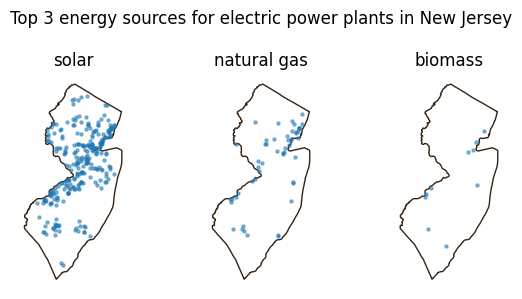

In [28]:
plot_3_energy_sources('New Jersey', 
                         top3_sources('New Jersey', power_plants),
                         power_plants)

**Exercise:**
Write a function states_with_source that takes a primary energy source (e.g., ‘solar’) and returns a list of states that use that source.

In [64]:
# def states_with_source(power_plants, primary_energy_source): 
    
#     assert power_plants['primsource'].isin([primary_energy_source]).any()
    
#     return power_plants['state'][list(power_plants.index[power_plants['primsource'] == primary_energy_source])].unique()

def states_with_source(power_plants, primary_energy_source):
    return power_plants.loc[power_plants['primsource'] == primary_energy_source, 'state'].unique()

        
print(states_with_source(power_plants, 'solar'))

['Massachusetts' 'California' 'Arizona' 'Nevada' 'Colorado' 'New Jersey'
 'North Carolina' 'Florida' 'Pennsylvania' 'Illinois' 'Texas' 'Ohio'
 'New Mexico' 'Delaware' 'Oregon' 'Vermont' 'New York' 'Maryland' 'Utah'
 'Georgia' 'Minnesota' 'Indiana' 'Rhode Island' 'Tennessee' 'Connecticut'
 'South Carolina' 'Missouri' 'Kansas' 'Virginia' 'Idaho' 'Nebraska'
 'Wisconsin' 'Michigan' 'Arkansas' 'Alabama' 'Mississippi' 'Maine'
 'South Dakota' 'Kentucky' 'Iowa' 'Montana' 'Wyoming' 'Oklahoma'
 'Louisiana' 'Washington' 'District of Columbia' 'New Hampshire']
